# Mini Project II - House Price Prediction

## Data Preprocessing

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
housing_data = pd.read_csv('HousingData.csv')

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
housing_data_imputed = pd.DataFrame(imputer.fit_transform(housing_data), columns=housing_data.columns)

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
features = housing_data_imputed.drop('MEDV', axis=1)
scaled_features = scaler.fit_transform(features)

# Combine the scaled features with the target variable
housing_data_preprocessed = pd.DataFrame(scaled_features, columns=features.columns)
housing_data_preprocessed['MEDV'] = housing_data_imputed['MEDV']

# Split the data into training and testing sets
X = housing_data_preprocessed.drop('MEDV', axis=1)
y = housing_data_preprocessed['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## Exploratory Data Analyis (EDA)

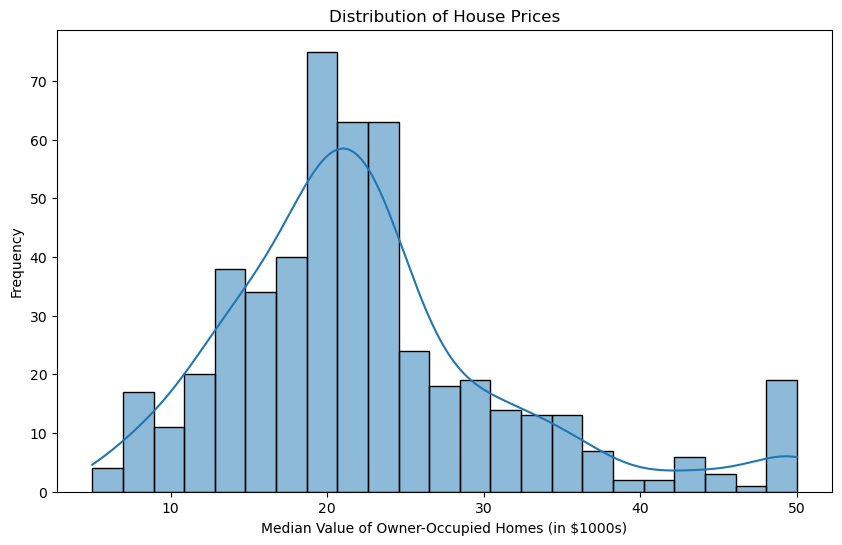

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (house prices)
plt.figure(figsize=(10, 6))
sns.histplot(housing_data_imputed['MEDV'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.ylabel('Frequency')
plt.show()

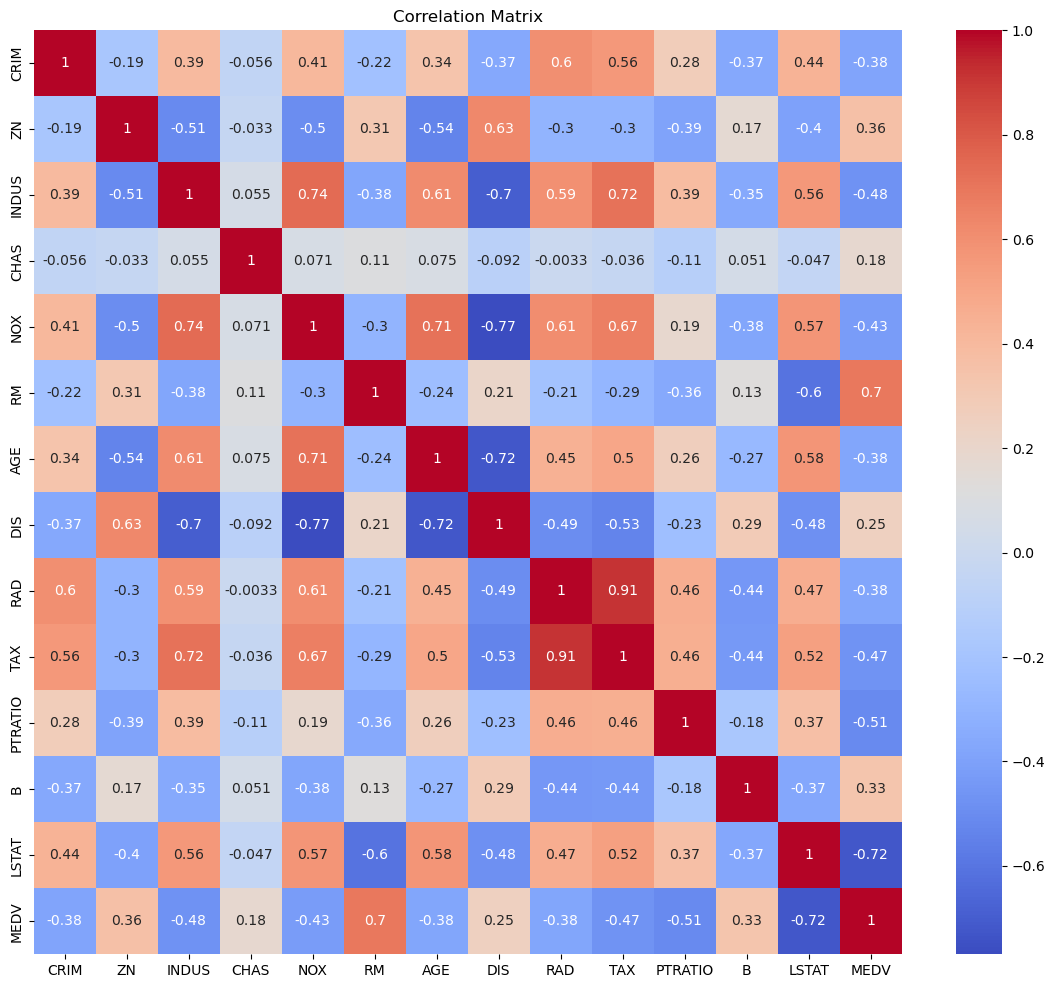

In [19]:
# Explore relationships between features and the target variable using scatter plots and correlation matrix
plt.figure(figsize=(14, 12))
correlation_matrix = housing_data_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

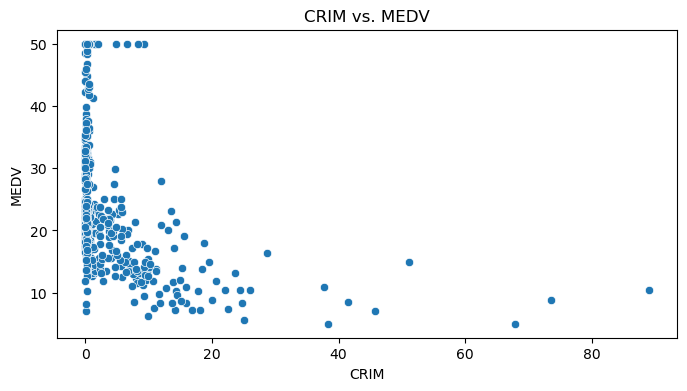

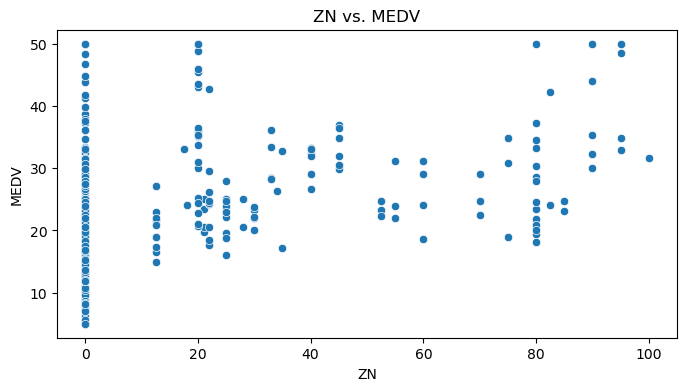

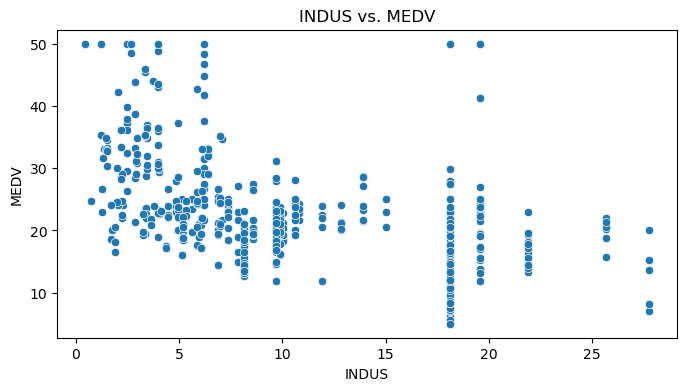

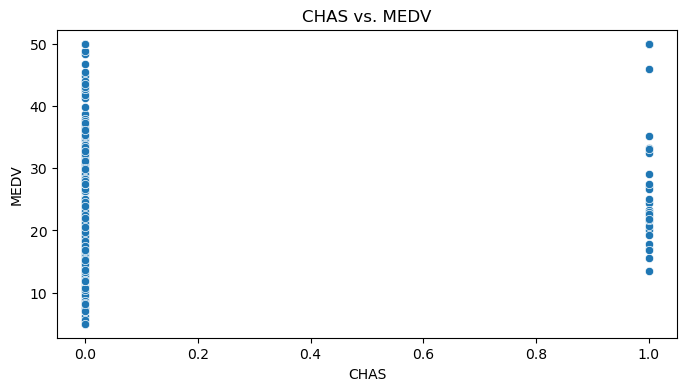

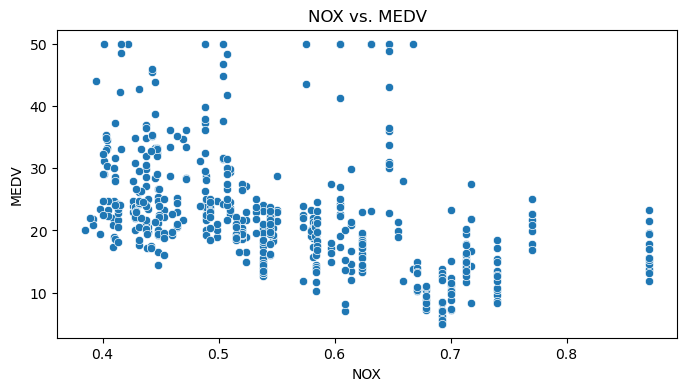

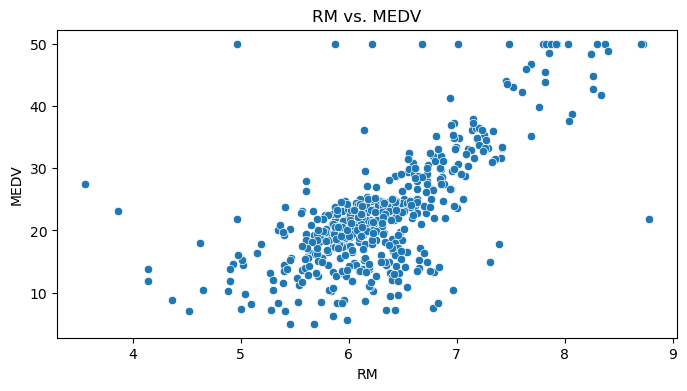

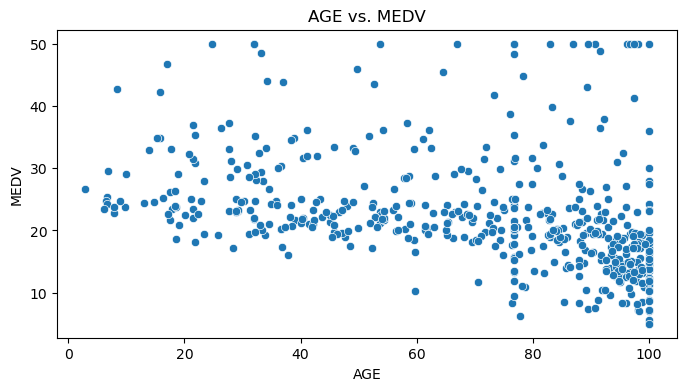

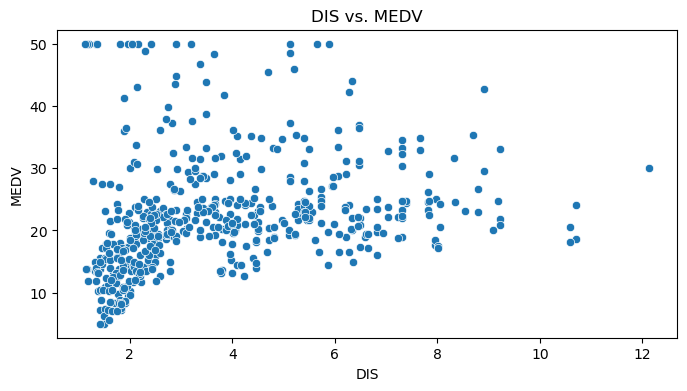

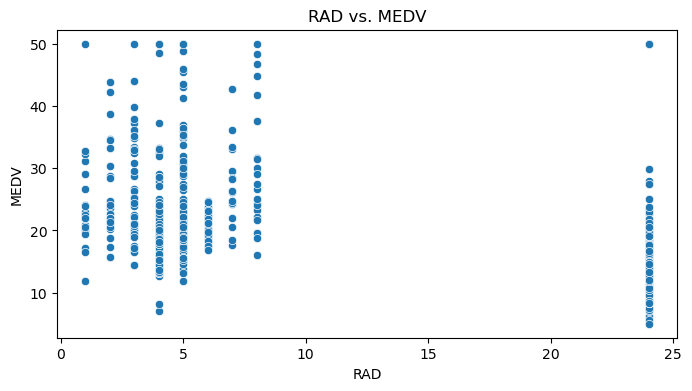

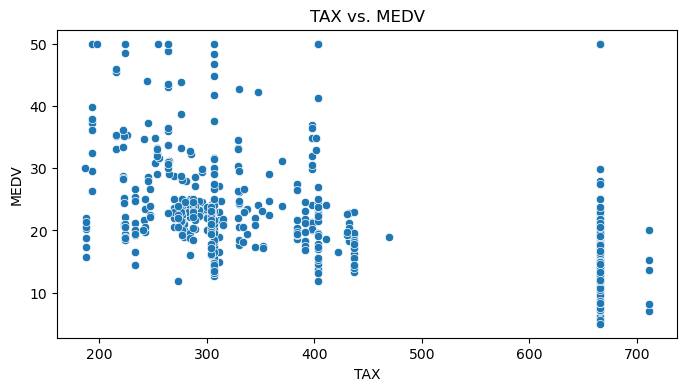

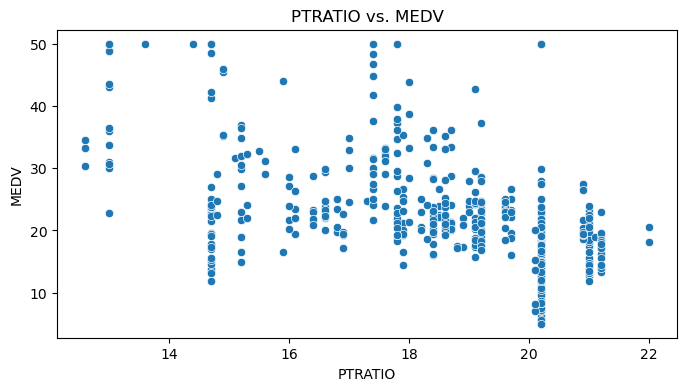

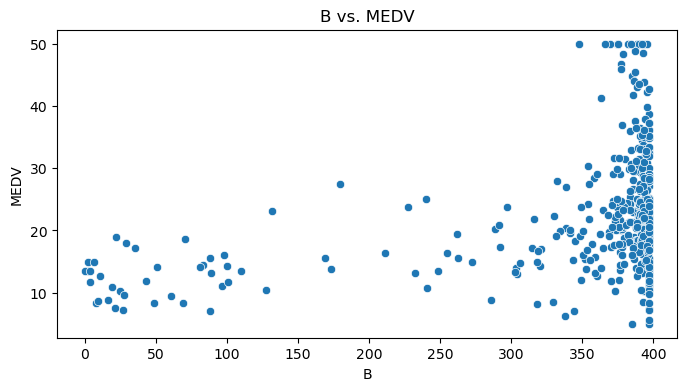

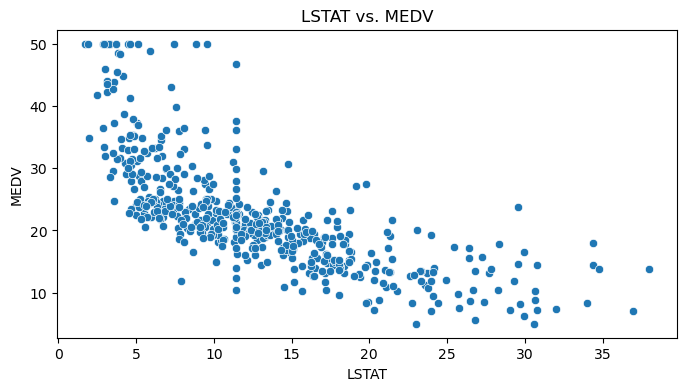

In [21]:
# Scatter plots of features vs. target variable
for feature in X.columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=housing_data_imputed[feature], y=housing_data_imputed['MEDV'])
    plt.title(f'{feature} vs. MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

## Model Training

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

Linear Regression - MAE: 3.1487373170237603, MSE: 24.99938479010336, R2: 0.6591013893903511
Decision Tree - MAE: 2.9598039215686276, MSE: 24.001274509803917, R2: 0.6727119006347713
Random Forest - MAE: 2.068960784313725, MSE: 8.236747294117647, R2: 0.8876814076793175


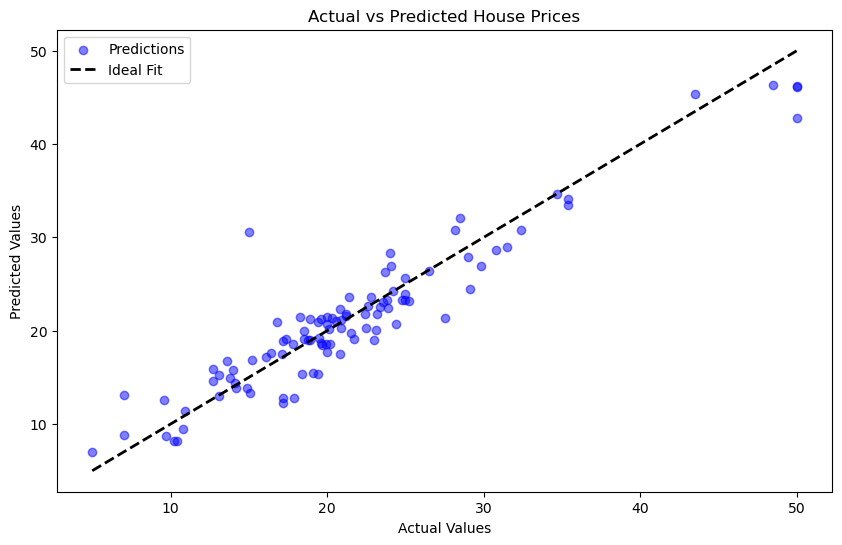

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Evaluate the Linear Regression model
lr_mae, lr_mse, lr_r2 = evaluate_model(lr_model, X_test, y_test)
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, R2: {lr_r2}")

# Evaluate the Decision Tree model
dt_mae, dt_mse, dt_r2 = evaluate_model(dt_model, X_test, y_test)
print(f"Decision Tree - MAE: {dt_mae}, MSE: {dt_mse}, R2: {dt_r2}")

# Evaluate the Random Forest model
rf_mae, rf_mse, rf_r2 = evaluate_model(rf_model, X_test, y_test)
print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, R2: {rf_r2}")

# Visualize the model's predictions versus the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(X_test), color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()